In [1]:
import os
import pandas as pd
from pandas import DataFrame, Series, read_excel, read_csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

color = sns.color_palette()
%matplotlib inline
plt.figure(figsize=(8,6))

# pd.options.mode.chained_assignment = None
# pd.options.display.max_rows = 65

<hr>

# Reading data

In [3]:
df = read_excel(f + 'usage1.xlsx')

In [2]:
# saving data folder path as variable
f = "../../Fall 2017 Exploratory Case/"

In [47]:
# listing all the files in data folders
DataFrame(os.listdir(f))

,0
0,Check Results - Exploratory-DailyTotals.xlsx
1,Fall 2017 Exploratory Case Study Data Definiti...
2,RidesTable.csv
3,TicketCategories.csv
4,Usage1.xlsx
5,Usage10.xlsx
6,Usage11.xlsx
7,Usage12.xlsx
8,Usage13.xlsx
9,Usage14.xlsx


In [90]:
# reading Usage files in a dictionary
usage = dict()
for i in range(1, 18):
    file_name = "Usage" + str(i) + ".xlsx"
    usage[i] = read_excel(f + file_name)

In [91]:
# Read other data files
rides_table  = read_csv(f + "RidesTable.csv")
ticket_categories  = read_csv(f + "TicketCategories.csv")
daily_totals = read_excel(f+'Check Results - Exploratory-DailyTotals.xlsx')

<hr>

# Data Preview

### Rides Information Table

In [80]:
rides_table.head()

,RideID,Name,Points,Type,LongName
0,3,Avatar,6,Rides,Avatar Airbender
1,4,Azul,3,Rides,La Aventura de Azul
2,5,Balloon,3,Rides,Balloon Race
3,7,BigRigs,3,Rides,Big Rigs
4,8,Blasters,6,Rides,Ghostblasters


### Daily Ridership

In [79]:
daily_totals.head()

,Date,Total
0,2015-10-01,3789
1,2015-10-02,12586
2,2015-10-03,29986
3,2015-10-04,16240
4,2015-10-05,6444


### Ticket Categories

In [126]:
ticket_categories.head()

,AccessCodeID,AccessCode,Name,Type,Category,Subcategory
0,108455,141,Old Points Ticket Access Code,Old,None,None
1,108457,10020,Old 20 Point Access Code,Old,None,None
2,108522,50101,All Day Unlimited Use,WB,Regular POS Sales,Regular WB
3,2373083,50102,2-Day Unlimited Use,WB,Regular POS Sales,WB + Attraction
4,3202875,50103,2-Day Unlimited Use Online,WB,Online Sales,WB + Attraction


## Usage Tables

In [106]:
dtype_df = usage[1].dtypes.reset_index()
dtype_df.columns = ['column_name', 'dtype']
dtype_df

,column_name,dtype
0,usageid,int64
1,usetime,datetime64[ns]
2,accesscode,int64
3,visualid,int64
4,rideid,int64
5,qty,int64
6,useno,int64


### Combining all Usage files into one 

In [112]:
usage_df_list = list()
for i in range(1, 18):
    usage_df_list.append(usage[i])
    
usage_combine = pd.concat(usage_df_list)

In [168]:
#Add month and year column
usage_combine['month'] = usage_combine.usetime.dt.month
usage_combine['year'] = usage_combine.usetime.dt.year
usage_combine['day_of_week'] = usage_combine.usetime.dt.dayofweek
usage_combine['day_of_week'] = usage_combine['day_of_week'] + 1
usage_combine['hour'] = usage_combine.usetime.dt.hour

In [125]:
# Final size of all usage files combined
print 'Combined Usage file: {0} Rows and {1} columns'.format(usage_combine.shape[0], usage_combine.shape[1])

Combined Usage file: 16367112 Rows and 7 columns


## Checking for null values

In [121]:
print usage_combine.isnull().sum(axis=0).reset_index()

        index  0
0     usageid  0
1     usetime  0
2  accesscode  0
3    visualid  0
4      rideid  0
5         qty  0
6       useno  0


<b><font color='blue'>No Null values found</b></font>

# EDA

In [169]:
usage_combine.head()

,usageid,usetime,accesscode,visualid,rideid,qty,useno,month,year,day_of_week,hour
0,95408610,2017-08-15 09:55:08.530,53001,53001115784290,25,1,1,8,2017,2,9
1,95408611,2017-08-15 09:55:19.623,50501,50501031310395,27,1,1,8,2017,2,9
2,95408612,2017-08-15 09:55:19.967,50501,50501031310396,27,1,1,8,2017,2,9
3,95408613,2017-08-15 09:55:26.297,53001,53001115784272,25,1,1,8,2017,2,9
4,95408614,2017-08-15 09:55:28.187,53001,53001115784289,25,1,1,8,2017,2,9


<b>Year wise ridership</b>

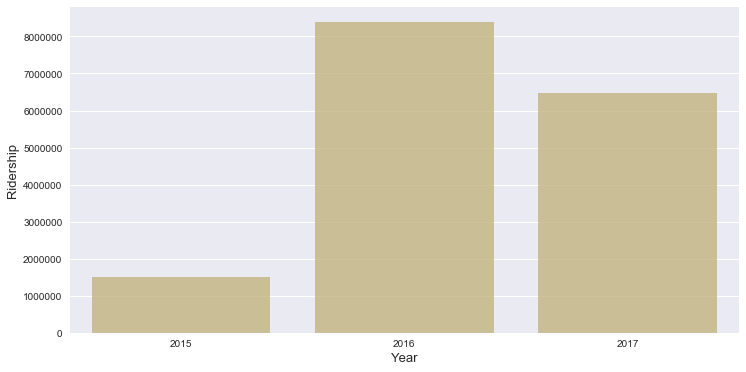

In [194]:
year_ridership = usage_combine.usetime.dt.year.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(year_ridership.index, year_ridership.values, alpha=0.8, color=color[4])
# plt.xticks(rotation='vertical')
plt.xlabel('Year', fontsize=13)
plt.ylabel('Ridership', fontsize=13)
plt.show()

<b>Month-wise ridership</b>

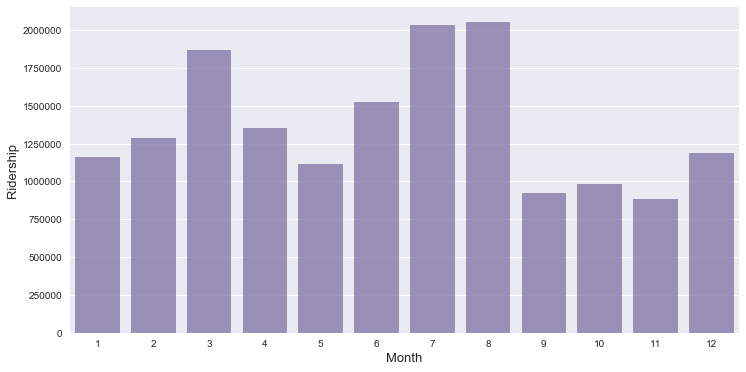

In [195]:
month_ridership = usage_combine.usetime.dt.month.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(month_ridership.index, month_ridership.values, alpha=0.8, color=color[3])
# plt.xticks(rotation='vertical')
plt.xlabel('Month', fontsize=13)
plt.ylabel('Ridership', fontsize=13)
plt.show()

<b>Month-Year vs Ridership</b>

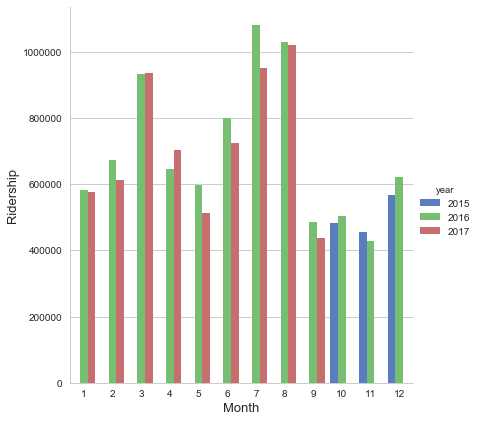

In [207]:
year_month_ridership = usage_combine.groupby(['year', 'month']).size().reset_index()
year_month_ridership.columns = [u'year', u'month', 'ridership']

sns.set(style="whitegrid")

# Draw a nested barplot to show month-year wise ridership
g = sns.factorplot(x="month", y="ridership", hue="year", data=year_month_ridership,
                   size=6, kind="bar", palette="muted")
# g.despine(left=True)
plt.xlabel('Month', fontsize=13)
plt.ylabel('Ridership', fontsize=13)

<b>Day of the Week vs Ridership</b>

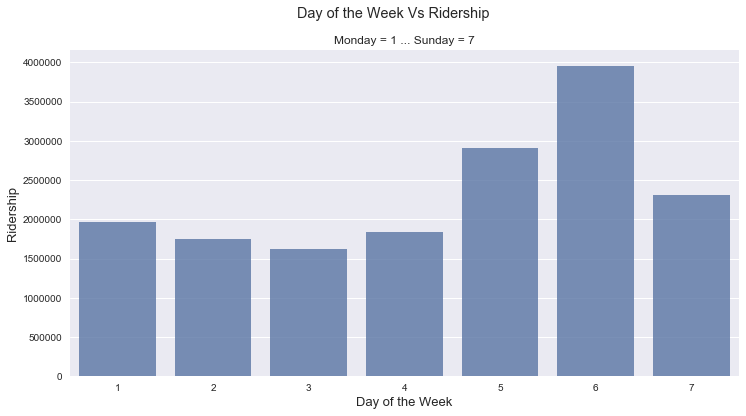

In [199]:
day_of_week_ridership = usage_combine.day_of_week.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(day_of_week_ridership.index, day_of_week_ridership.values, alpha=0.8, color=color[0])
# plt.xticks(rotation='vertical')
plt.xlabel('Day of the Week', fontsize=13)
plt.ylabel('Ridership', fontsize=13)
plt.suptitle('Day of the Week Vs Ridership')
plt.title('Monday = 1 ... Sunday = 7')
plt.show()

In [211]:
# plt.figure(figsize=(12,8))
# sns.boxplot(x="day_of_week", y="logerror", data=usage_combine)
# plt.ylabel('Log error', fontsize=12)
# plt.xlabel('Bathroom Count', fontsize=12)
# plt.xticks(rotation='vertical')
# plt.title("How log error changes with bathroom count?", fontsize=15)
# plt.show()

<b>Hour of the Day Vs Ridership</b>

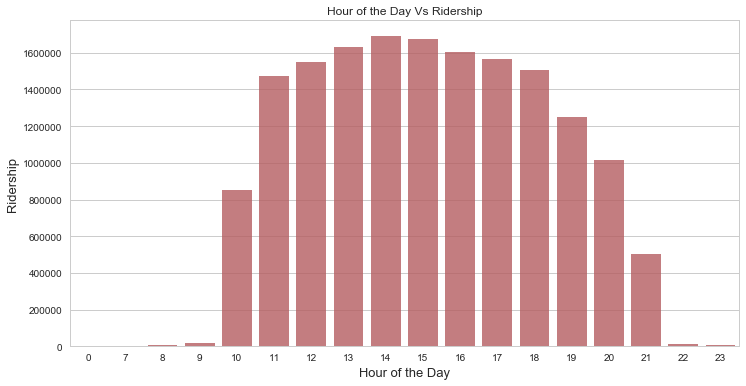

In [210]:
hour_of_day_ridership = usage_combine.hour.value_counts()
plt.figure(figsize=(12,6))
sns.barplot(hour_of_day_ridership.index, hour_of_day_ridership.values, alpha=0.8, color=color[2])
# plt.xticks(rotation='vertical')
plt.xlabel('Hour of the Day', fontsize=13)
plt.ylabel('Ridership', fontsize=13)
plt.title('Hour of the Day Vs Ridership')
plt.show()

<b> Rides vs Ridership Distribution</b>

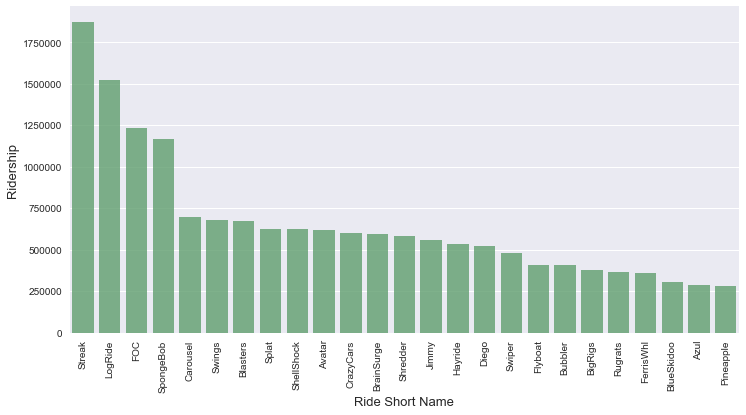

In [193]:
ride_id_ridership = usage_combine.rideid.value_counts().reset_index()
ride_id_ridership.columns = [u'RideID', u'Ridership']
ride_ridership = pd.merge(ride_id_ridership, rides_table, on="RideID")

sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
sns.barplot(ride_ridership.Name, ride_id_ridership.Ridership, alpha=0.8, color=color[1])
# plt.xticks(rotation='vertical')
plt.xlabel('Ride Short Name', fontsize=13)
plt.xticks(rotation ='vertical')
plt.ylabel('Ridership', fontsize=13)
plt.show()